In [81]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [83]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "binary_cleveland/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in df.iloc[0:1,9:].columns.values])
df.rename(columns=new_names, inplace=True)

df = df[df['metric_accuracy'].notna()]
df

model main_metric  sample_size feature_selector  \
0                       svm    accuracy          0.1              rfe   
1                       svm    accuracy          0.1              rfe   
2                       svm    accuracy          0.1              rfe   
3                       svm    accuracy          0.1              rfe   
4                       svm    accuracy          0.1              rfe   
...                     ...         ...          ...              ...   
506821  logistic_regression          f1          1.0              rfe   
506822  logistic_regression          f1          1.0              rfe   
506823  logistic_regression          f1          1.0              rfe   
506824  logistic_regression          f1          1.0              rfe   
506825  logistic_regression          f1          1.0              rfe   

        feature_selection_frac     validation_type  train_size  cv_split_size  \
0                          0.4                  ts         0.6            NaN   
1                          0.4                  ts         0.6            NaN   
2                          0.4                  ts         0.6            NaN   
3                          0.4                  ts         0.6            NaN   
4                          0.4                  ts         0.6            NaN   
...                        ...                 ...         ...            ...   
506821                     1.0  fs_kfold_pt_nested         NaN           13.0   
506822                     1.0  fs_kfold_pt_nested         NaN           13.0   
506823                     1.0  fs_kfold_pt_nested         NaN           13.0   
506824                     1.0  fs_kfold_pt_nested         NaN           13.0   
506825                     1.0  fs_kfold_pt_nested         NaN           13.0   

        par_split_size  metric_accuracy  metric_balanced_accuracy  metric_f1  \
0                    2         0.750000                  0.750000   0.748252   
1                    2         0.416667                  0.416667   0.412587   
2                    2         0.583333                  0.583333   0.555556   
3                    2         0.500000                  0.500000   0.485714   
4                    2         0.750000                  0.750000   0.748252   
...                ...              ...                       ...        ...   
506821              13         0.838071                  0.835983   0.836974   
506822              13         0.831243                  0.828904   0.829216   
506823              13         0.835424                  0.831720   0.834153   
506824              13         0.831382                  0.827277   0.830202   
506825              13         0.838350                  0.833817   0.836857   

        metric_precision  metric_recall  
0               0.757143       0.750000  
1               0.414286       0.416667  
2               0.611111       0.583333  
3               0.500000       0.500000  
4               0.757143       0.750000  
...                  ...            ...  
506821          0.846937       0.838071  
506822          0.845845       0.831243  
506823          0.839564       0.835424  
506824          0.836791       0.831382  
506825          0.846426       0.838350  

[506700 rows x 14 columns]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506700 entries, 0 to 506825
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   model                     506700 non-null  object 
 1   main_metric               506700 non-null  object 
 2   sample_size               506700 non-null  float64
 3   feature_selector          506700 non-null  object 
 4   feature_selection_frac    506700 non-null  float64
 5   validation_type           506700 non-null  object 
 6   train_size                80100 non-null   float64
 7   cv_split_size             399600 non-null  float64
 8   par_split_size            506700 non-null  int64  
 9   metric_accuracy           506700 non-null  float64
 10  metric_balanced_accuracy  506700 non-null  float64
 11  metric_f1                 506700 non-null  float64
 12  metric_precision          506700 non-null  float64
 13  metric_recall             506700 non-null  f

In [86]:
selection = df[(df['feature_selection_frac'] == 1.0)
    & (df['main_metric'] == 'accuracy')
    & ((df['train_size'] == 0.8) | df['train_size'].isna())
    & ((df['cv_split_size'] == 13.0) | df['cv_split_size'].isna())]

In [87]:
selection = selection.reset_index()

In [88]:
pivoted = pd.wide_to_long(selection, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted.reset_index(inplace=True)
pivoted = pivoted.drop('index', axis=1)
pivoted.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted

metric_type  feature_selection_frac feature_selector  \
0        accuracy                     1.0              rfe   
1        accuracy                     1.0              rfe   
2        accuracy                     1.0              rfe   
3        accuracy                     1.0              rfe   
4        accuracy                     1.0              rfe   
...           ...                     ...              ...   
74995      recall                     1.0              rfe   
74996      recall                     1.0              rfe   
74997      recall                     1.0              rfe   
74998      recall                     1.0              rfe   
74999      recall                     1.0              rfe   

                     model main_metric     validation_type  train_size  \
0                      svm    accuracy                  ts         0.8   
1                      svm    accuracy                  ts         0.8   
2                      svm    accuracy                  ts         0.8   
3                      svm    accuracy                  ts         0.8   
4                      svm    accuracy                  ts         0.8   
...                    ...         ...                 ...         ...   
74995  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74996  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74997  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74998  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74999  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   

       par_split_size  cv_split_size  sample_size  metric_measurement  
0                   2            NaN          0.1            0.500000  
1                   2            NaN          0.1            0.500000  
2                   2            NaN          0.1            0.500000  
3                   2            NaN          0.1            0.500000  
4                   2            NaN          0.1            0.500000  
...               ...            ...          ...                 ...  
74995              13           13.0          1.0            0.830964  
74996              13           13.0          1.0            0.831800  
74997              13           13.0          1.0            0.828456  
74998              13           13.0          1.0            0.835006  
74999              13           13.0          1.0            0.837932  

[75000 rows x 11 columns]

In [89]:
r = pivoted['sample_size'] * 303
pivoted['sample_size'] = r
pivoted

metric_type  feature_selection_frac feature_selector  \
0        accuracy                     1.0              rfe   
1        accuracy                     1.0              rfe   
2        accuracy                     1.0              rfe   
3        accuracy                     1.0              rfe   
4        accuracy                     1.0              rfe   
...           ...                     ...              ...   
74995      recall                     1.0              rfe   
74996      recall                     1.0              rfe   
74997      recall                     1.0              rfe   
74998      recall                     1.0              rfe   
74999      recall                     1.0              rfe   

                     model main_metric     validation_type  train_size  \
0                      svm    accuracy                  ts         0.8   
1                      svm    accuracy                  ts         0.8   
2                      svm    accuracy                  ts         0.8   
3                      svm    accuracy                  ts         0.8   
4                      svm    accuracy                  ts         0.8   
...                    ...         ...                 ...         ...   
74995  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74996  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74997  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74998  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74999  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   

       par_split_size  cv_split_size  sample_size  metric_measurement  
0                   2            NaN         30.3            0.500000  
1                   2            NaN         30.3            0.500000  
2                   2            NaN         30.3            0.500000  
3                   2            NaN         30.3            0.500000  
4                   2            NaN         30.3            0.500000  
...               ...            ...          ...                 ...  
74995              13           13.0        303.0            0.830964  
74996              13           13.0        303.0            0.831800  
74997              13           13.0        303.0            0.828456  
74998              13           13.0        303.0            0.835006  
74999              13           13.0        303.0            0.837932  

[75000 rows x 11 columns]

In [90]:
accuracy_selection = pivoted[pivoted['metric_type'] == 'accuracy']

In [91]:
accuracy_selection_lr = accuracy_selection[accuracy_selection['model'] == 'logistic_regression']
accuracy_selection_lr

metric_type  feature_selection_frac feature_selector  \
7500     accuracy                     1.0              rfe   
7501     accuracy                     1.0              rfe   
7502     accuracy                     1.0              rfe   
7503     accuracy                     1.0              rfe   
7504     accuracy                     1.0              rfe   
...           ...                     ...              ...   
14995    accuracy                     1.0              rfe   
14996    accuracy                     1.0              rfe   
14997    accuracy                     1.0              rfe   
14998    accuracy                     1.0              rfe   
14999    accuracy                     1.0              rfe   

                     model main_metric     validation_type  train_size  \
7500   logistic_regression    accuracy                  ts         0.8   
7501   logistic_regression    accuracy                  ts         0.8   
7502   logistic_regression    accuracy                  ts         0.8   
7503   logistic_regression    accuracy                  ts         0.8   
7504   logistic_regression    accuracy                  ts         0.8   
...                    ...         ...                 ...         ...   
14995  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
14996  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
14997  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
14998  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
14999  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   

       par_split_size  cv_split_size  sample_size  metric_measurement  
7500                2            NaN         30.3            0.333333  
7501                2            NaN         30.3            0.833333  
7502                2            NaN         30.3            1.000000  
7503                2            NaN         30.3            0.666667  
7504                2            NaN         30.3            0.833333  
...               ...            ...          ...                 ...  
14995              13           13.0        303.0            0.830964  
14996              13           13.0        303.0            0.831800  
14997              13           13.0        303.0            0.828456  
14998              13           13.0        303.0            0.835006  
14999              13           13.0        303.0            0.837932  

[7500 rows x 11 columns]

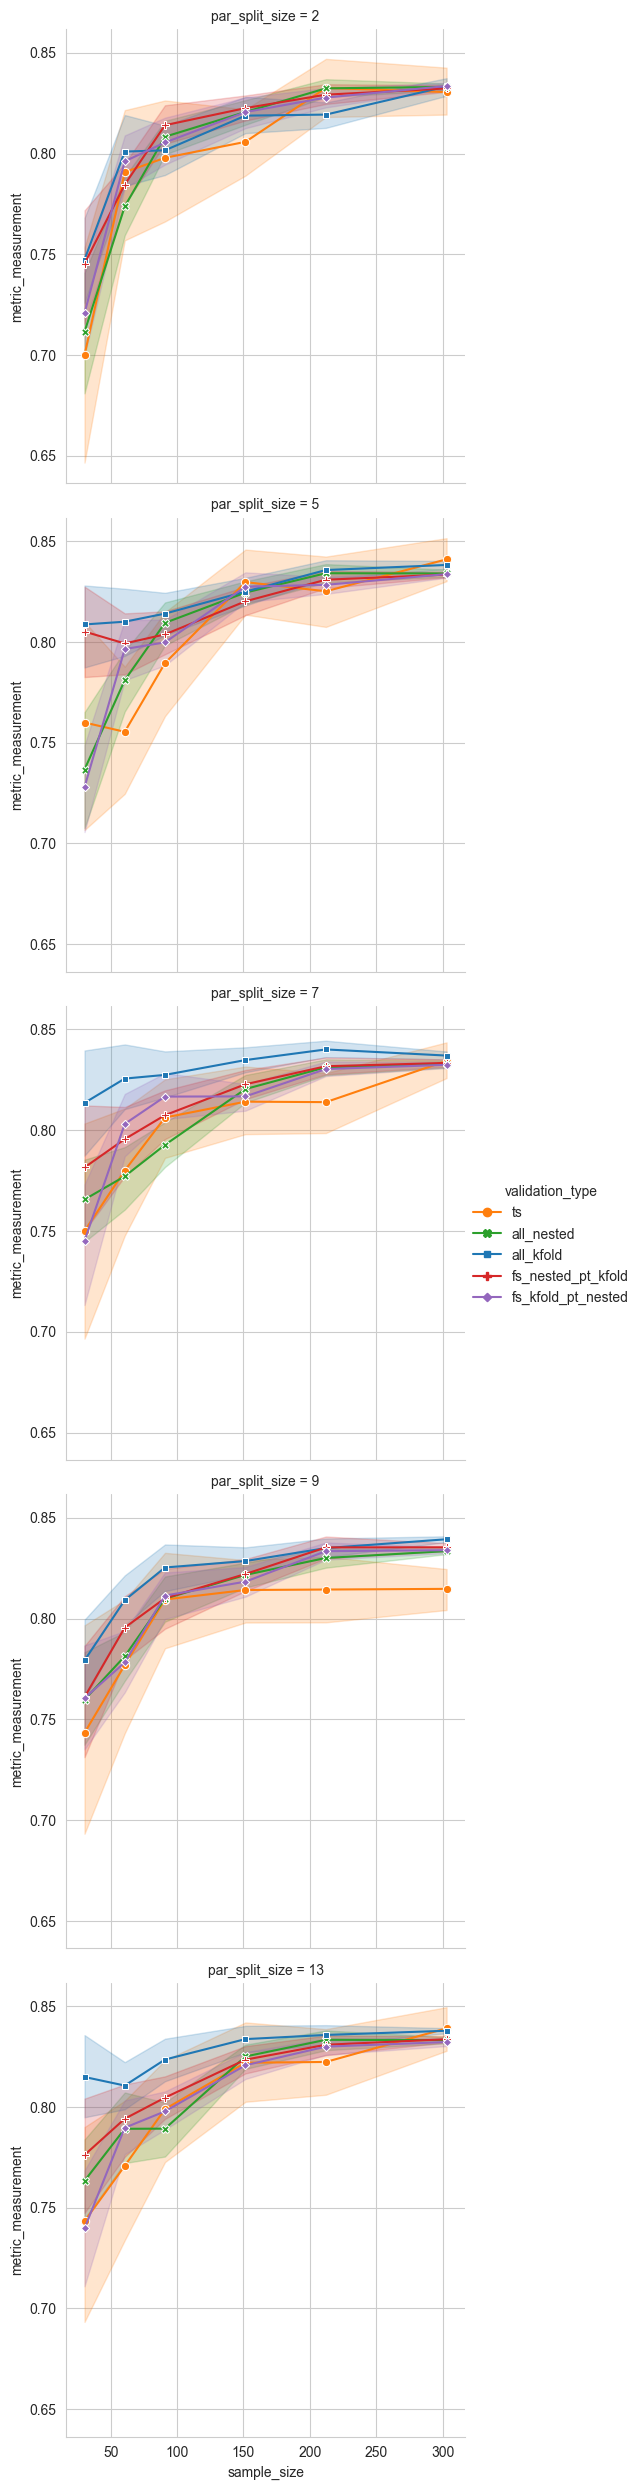

In [92]:
sns.relplot(x='sample_size', data=accuracy_selection_lr, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [93]:
selection_lr = pivoted[pivoted['model'] == 'logistic_regression']
selection_lr

metric_type  feature_selection_frac feature_selector  \
7500     accuracy                     1.0              rfe   
7501     accuracy                     1.0              rfe   
7502     accuracy                     1.0              rfe   
7503     accuracy                     1.0              rfe   
7504     accuracy                     1.0              rfe   
...           ...                     ...              ...   
74995      recall                     1.0              rfe   
74996      recall                     1.0              rfe   
74997      recall                     1.0              rfe   
74998      recall                     1.0              rfe   
74999      recall                     1.0              rfe   

                     model main_metric     validation_type  train_size  \
7500   logistic_regression    accuracy                  ts         0.8   
7501   logistic_regression    accuracy                  ts         0.8   
7502   logistic_regression    accuracy                  ts         0.8   
7503   logistic_regression    accuracy                  ts         0.8   
7504   logistic_regression    accuracy                  ts         0.8   
...                    ...         ...                 ...         ...   
74995  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74996  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74997  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74998  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   
74999  logistic_regression    accuracy  fs_kfold_pt_nested         NaN   

       par_split_size  cv_split_size  sample_size  metric_measurement  
7500                2            NaN         30.3            0.333333  
7501                2            NaN         30.3            0.833333  
7502                2            NaN         30.3            1.000000  
7503                2            NaN         30.3            0.666667  
7504                2            NaN         30.3            0.833333  
...               ...            ...          ...                 ...  
74995              13           13.0        303.0            0.830964  
74996              13           13.0        303.0            0.831800  
74997              13           13.0        303.0            0.828456  
74998              13           13.0        303.0            0.835006  
74999              13           13.0        303.0            0.837932  

[37500 rows x 11 columns]

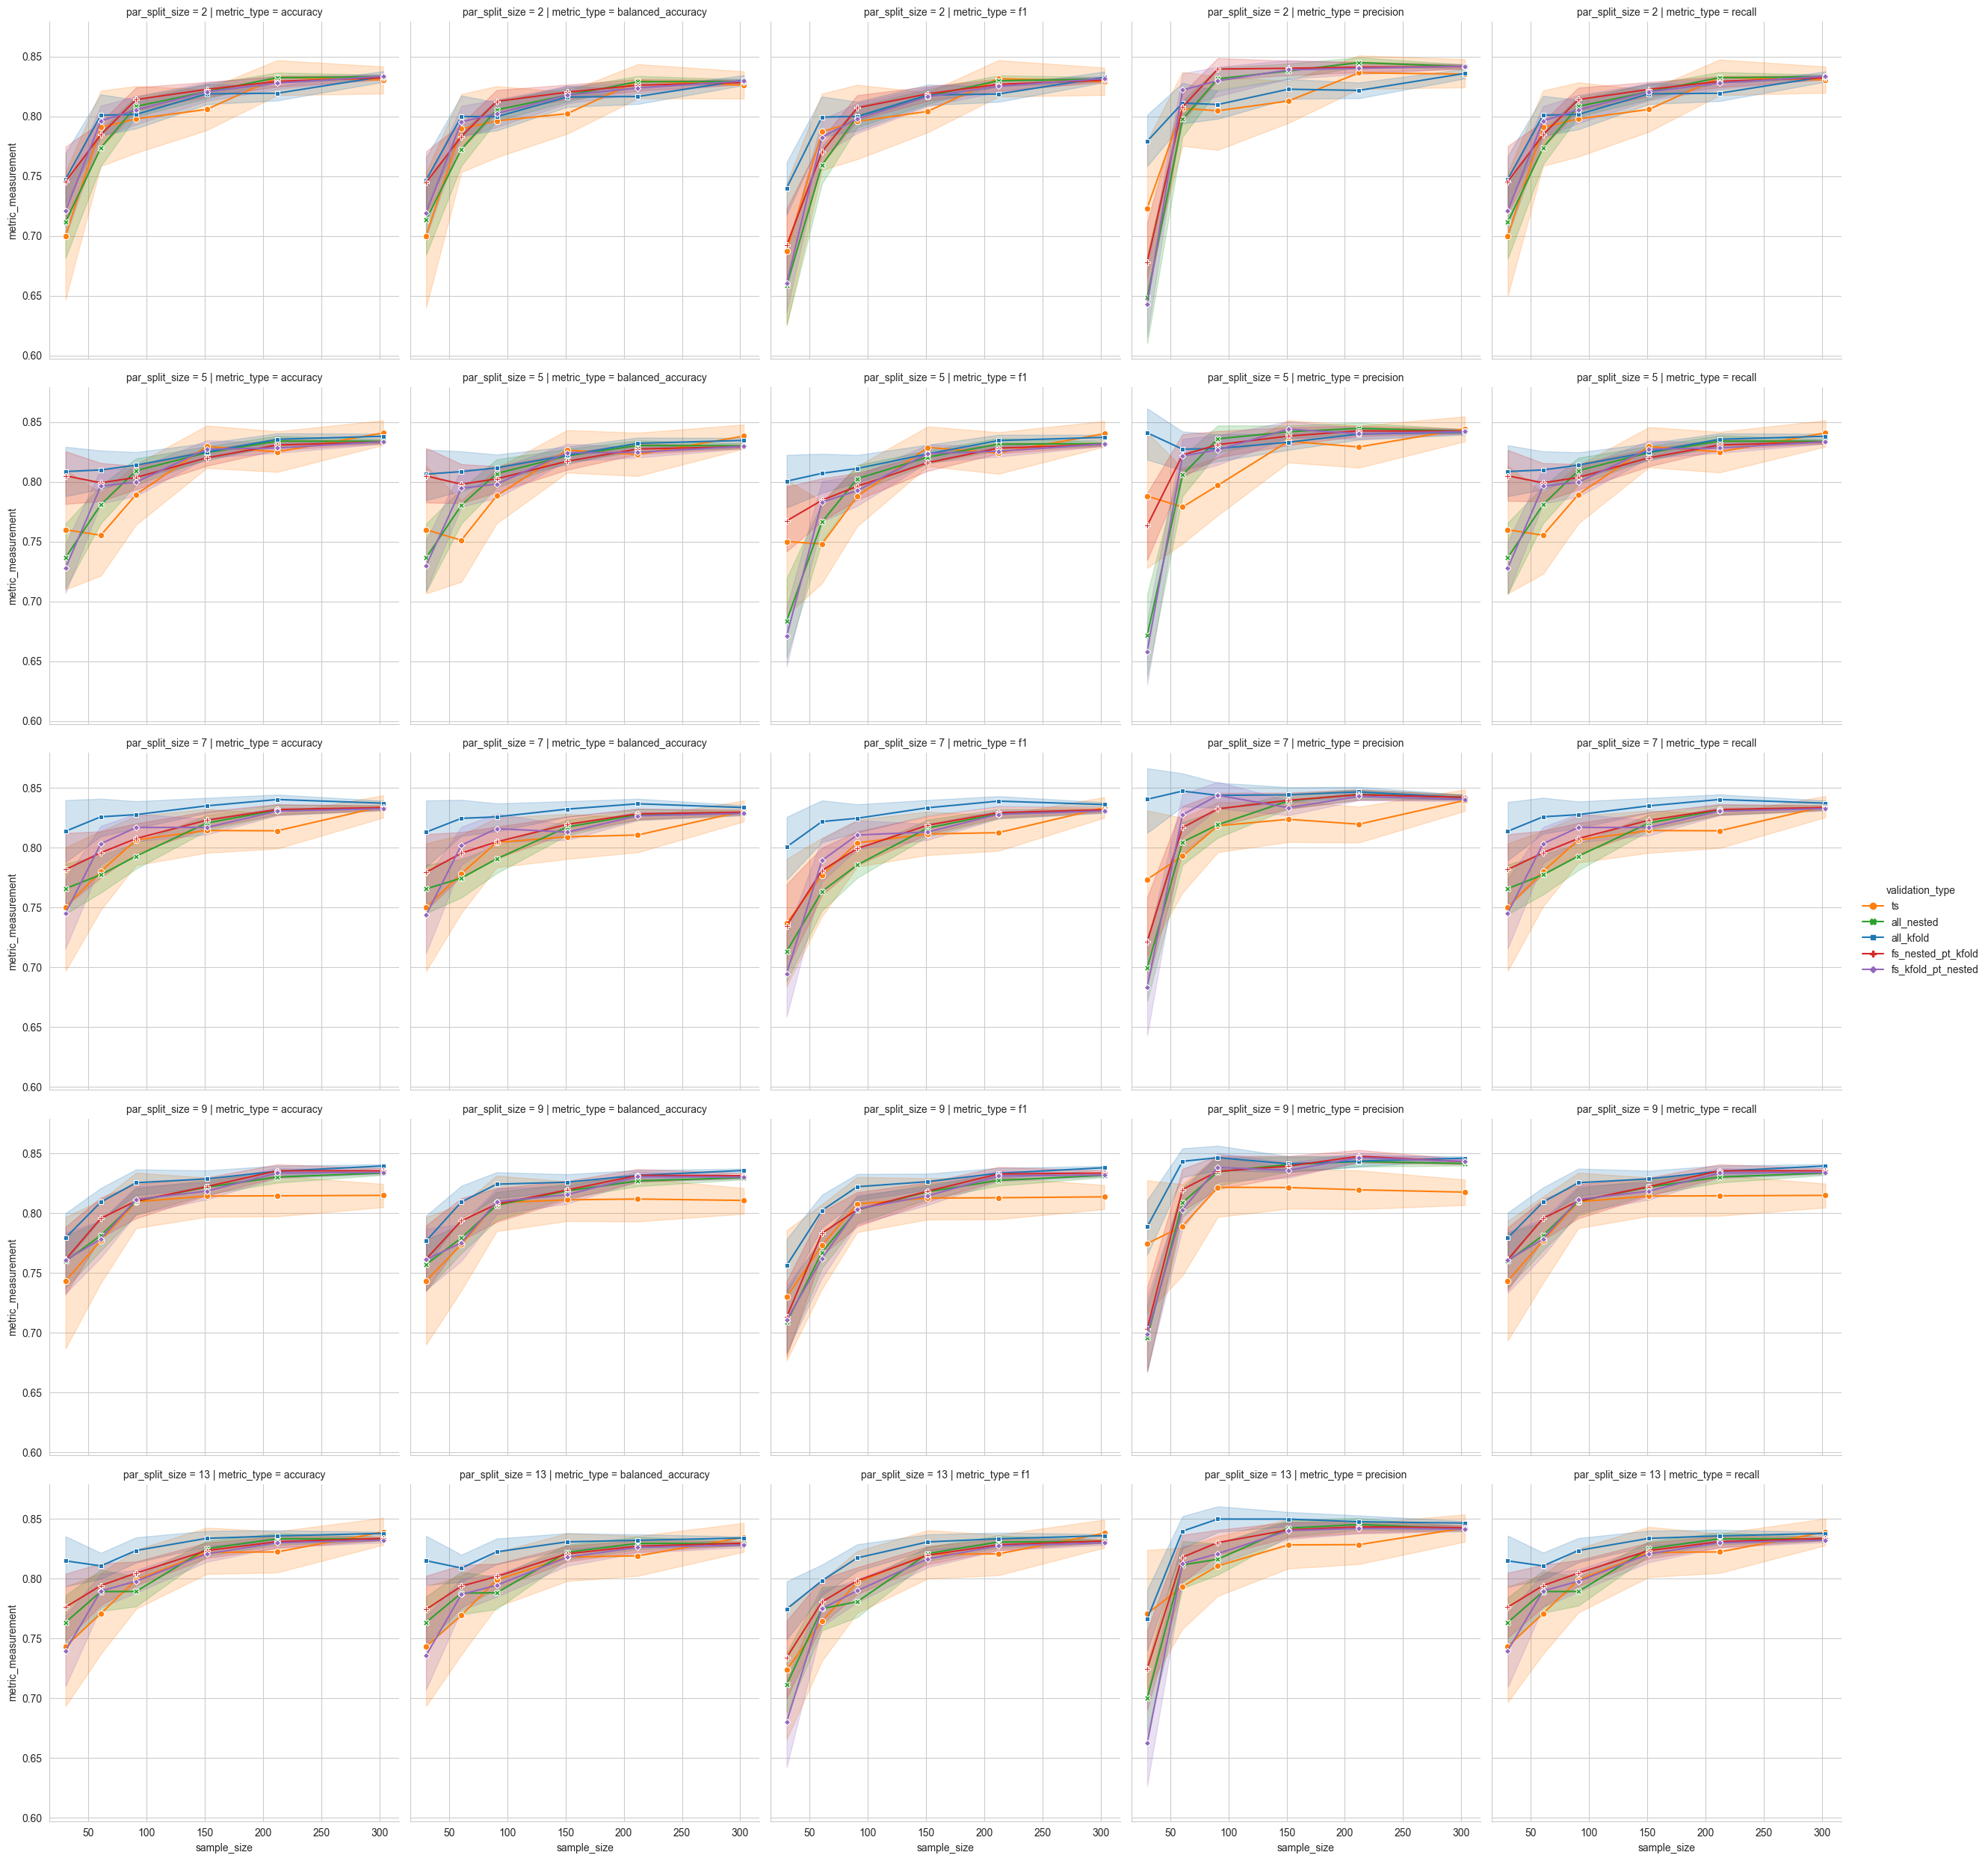

In [94]:
sns.relplot(x='sample_size', data=selection_lr, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [95]:
accuracy_selection_svm = accuracy_selection[accuracy_selection['model'] == 'svm']
accuracy_selection_svm

metric_type  feature_selection_frac feature_selector model main_metric  \
0       accuracy                     1.0              rfe   svm    accuracy   
1       accuracy                     1.0              rfe   svm    accuracy   
2       accuracy                     1.0              rfe   svm    accuracy   
3       accuracy                     1.0              rfe   svm    accuracy   
4       accuracy                     1.0              rfe   svm    accuracy   
...          ...                     ...              ...   ...         ...   
7495    accuracy                     1.0              rfe   svm    accuracy   
7496    accuracy                     1.0              rfe   svm    accuracy   
7497    accuracy                     1.0              rfe   svm    accuracy   
7498    accuracy                     1.0              rfe   svm    accuracy   
7499    accuracy                     1.0              rfe   svm    accuracy   

         validation_type  train_size  par_split_size  cv_split_size  \
0                     ts         0.8               2            NaN   
1                     ts         0.8               2            NaN   
2                     ts         0.8               2            NaN   
3                     ts         0.8               2            NaN   
4                     ts         0.8               2            NaN   
...                  ...         ...             ...            ...   
7495  fs_kfold_pt_nested         NaN              13           13.0   
7496  fs_kfold_pt_nested         NaN              13           13.0   
7497  fs_kfold_pt_nested         NaN              13           13.0   
7498  fs_kfold_pt_nested         NaN              13           13.0   
7499  fs_kfold_pt_nested         NaN              13           13.0   

      sample_size  metric_measurement  
0            30.3            0.500000  
1            30.3            0.500000  
2            30.3            0.500000  
3            30.3            0.500000  
4            30.3            0.500000  
...           ...                 ...  
7495        303.0            0.579710  
7496        303.0            0.567865  
7497        303.0            0.607302  
7498        303.0            0.599777  
7499        303.0            0.591276  

[7500 rows x 11 columns]

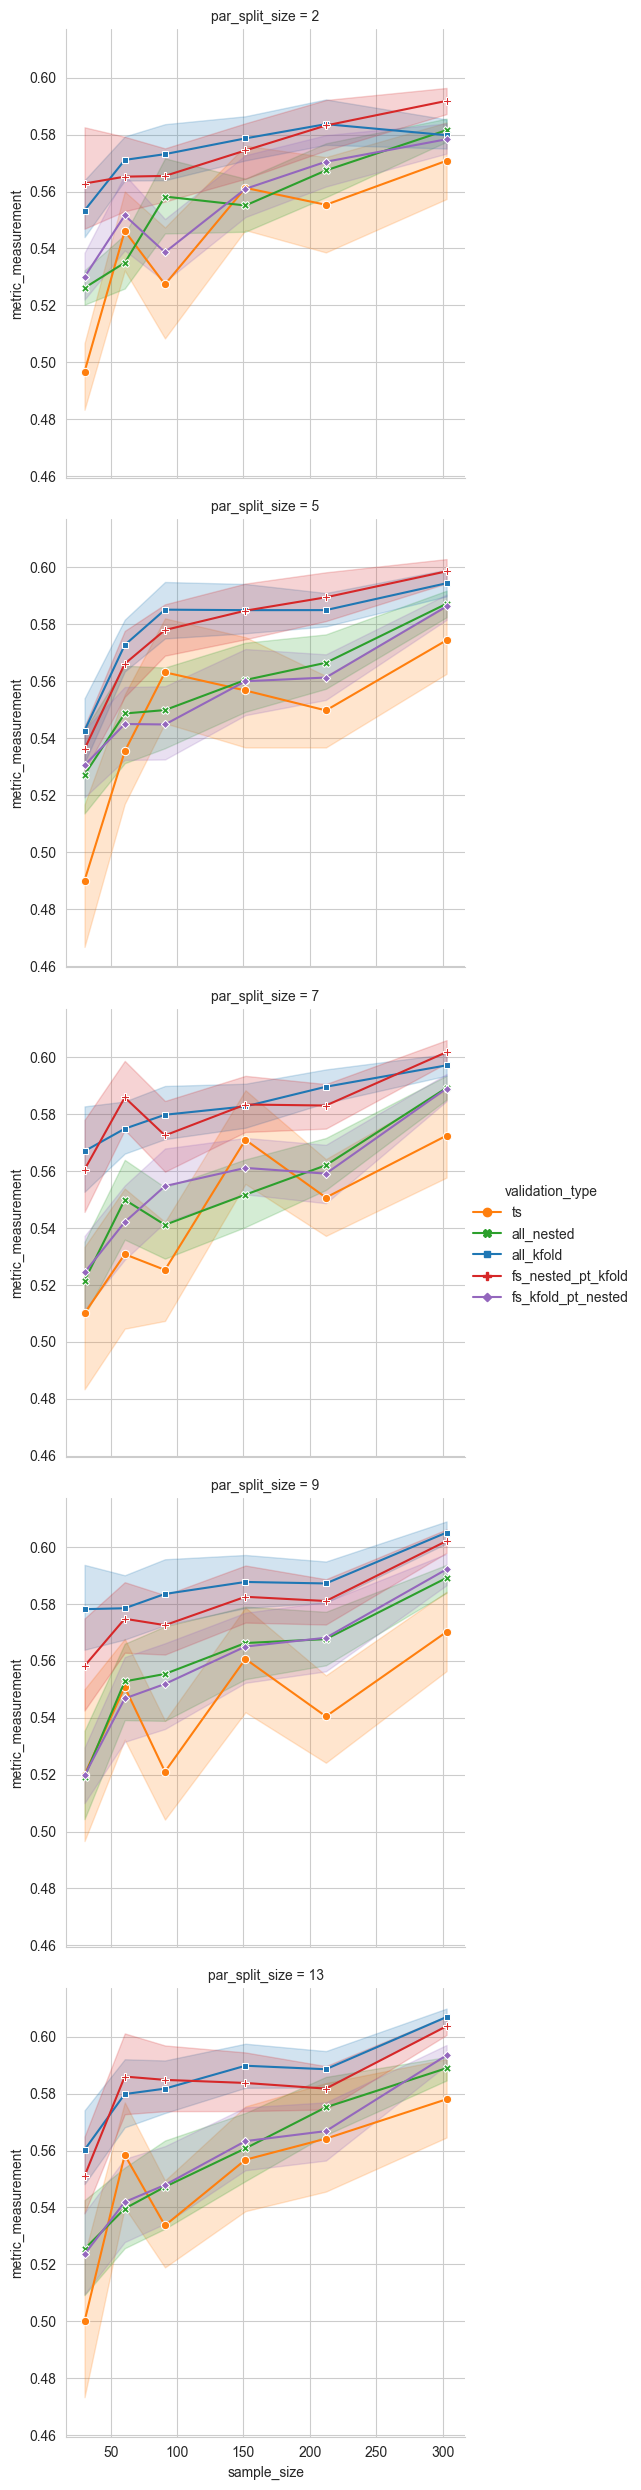

In [96]:
sns.relplot(x='sample_size', data=accuracy_selection_svm, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [97]:
selection_svm = pivoted[pivoted['model'] == 'svm']
selection_svm

metric_type  feature_selection_frac feature_selector model main_metric  \
0        accuracy                     1.0              rfe   svm    accuracy   
1        accuracy                     1.0              rfe   svm    accuracy   
2        accuracy                     1.0              rfe   svm    accuracy   
3        accuracy                     1.0              rfe   svm    accuracy   
4        accuracy                     1.0              rfe   svm    accuracy   
...           ...                     ...              ...   ...         ...   
67495      recall                     1.0              rfe   svm    accuracy   
67496      recall                     1.0              rfe   svm    accuracy   
67497      recall                     1.0              rfe   svm    accuracy   
67498      recall                     1.0              rfe   svm    accuracy   
67499      recall                     1.0              rfe   svm    accuracy   

          validation_type  train_size  par_split_size  cv_split_size  \
0                      ts         0.8               2            NaN   
1                      ts         0.8               2            NaN   
2                      ts         0.8               2            NaN   
3                      ts         0.8               2            NaN   
4                      ts         0.8               2            NaN   
...                   ...         ...             ...            ...   
67495  fs_kfold_pt_nested         NaN              13           13.0   
67496  fs_kfold_pt_nested         NaN              13           13.0   
67497  fs_kfold_pt_nested         NaN              13           13.0   
67498  fs_kfold_pt_nested         NaN              13           13.0   
67499  fs_kfold_pt_nested         NaN              13           13.0   

       sample_size  metric_measurement  
0             30.3            0.500000  
1             30.3            0.500000  
2             30.3            0.500000  
3             30.3            0.500000  
4             30.3            0.500000  
...            ...                 ...  
67495        303.0            0.579710  
67496        303.0            0.567865  
67497        303.0            0.607302  
67498        303.0            0.599777  
67499        303.0            0.591276  

[37500 rows x 11 columns]

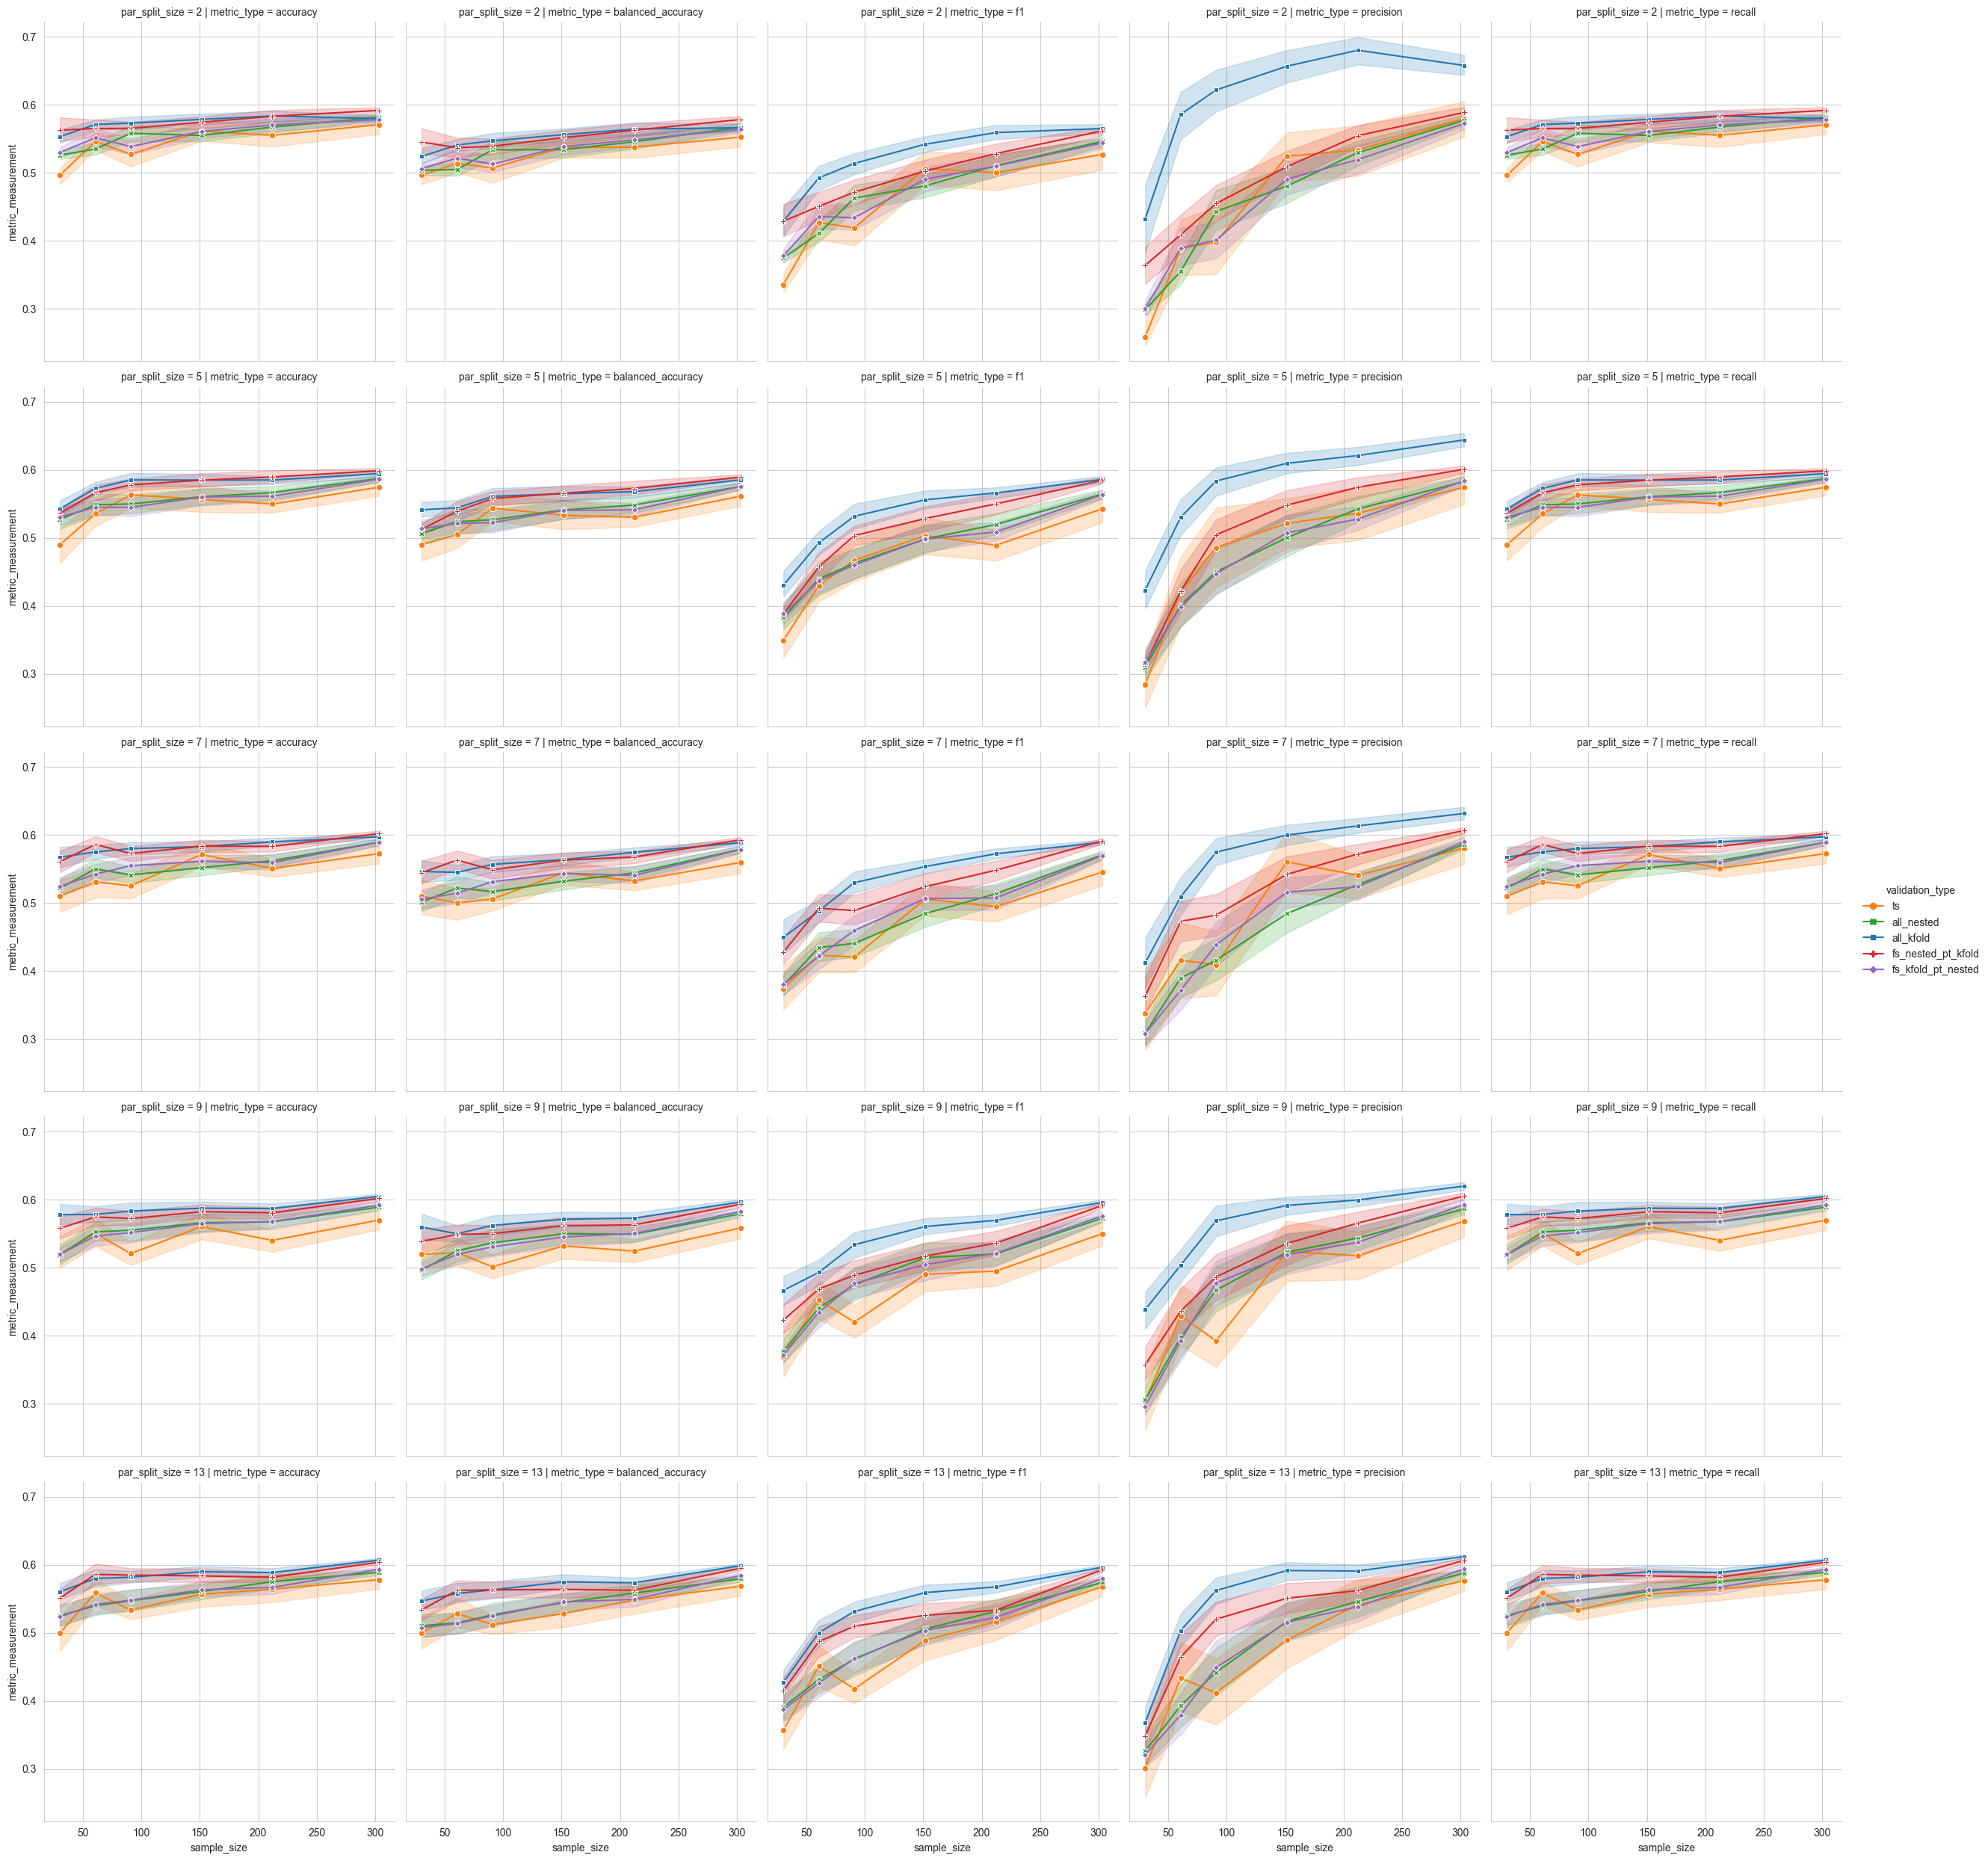

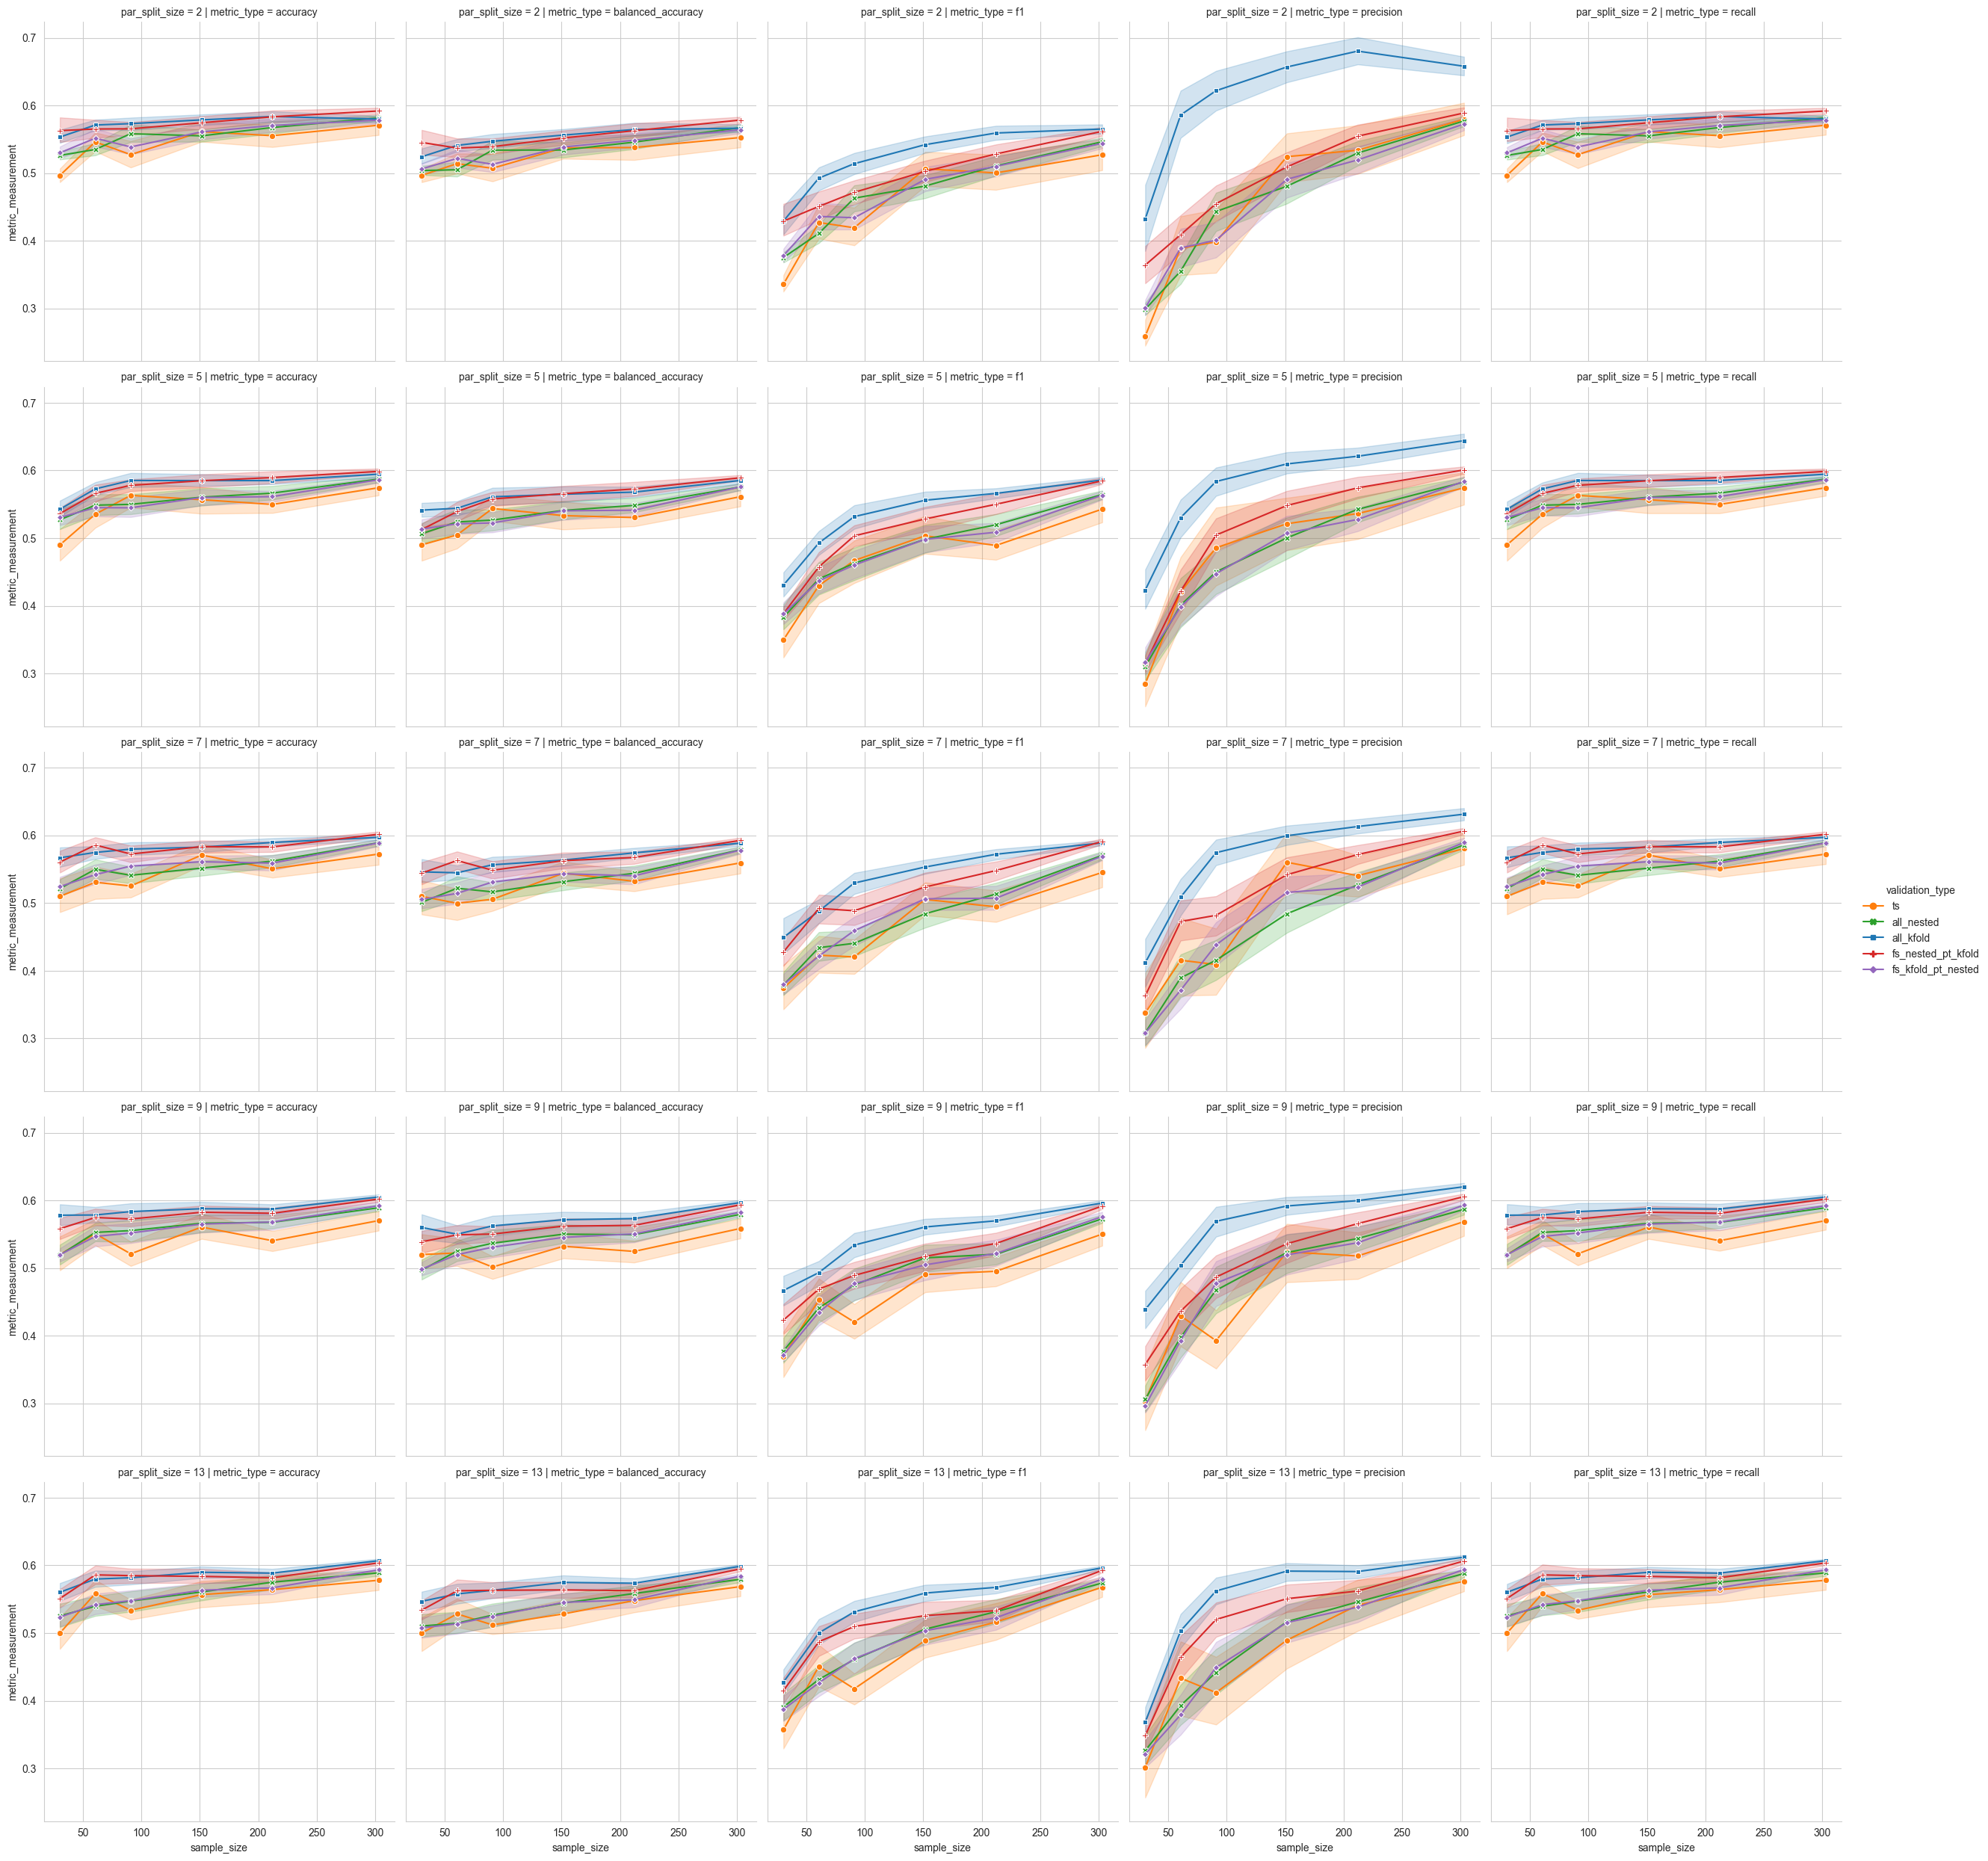

In [98]:
sns.relplot(x='sample_size', data=selection_svm, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()